In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [94]:
data=pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

In [95]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [97]:
print(pd.isnull(data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [98]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [99]:
data.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [100]:
data_modified = data.replace({'Yes': 1, "No": 0})
data_modified

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [101]:
print('Visit Frequency')
print(data_modified['VisitFrequency'].value_counts())
print('Gender')
print(data_modified['Gender'].value_counts())
print('Like')
print(data_modified['Like'].value_counts())

Visit Frequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64
Gender
Female    788
Male      665
Name: Gender, dtype: int64
Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64


In [59]:
data_modified['VisitFrequency'] = data_modified['VisitFrequency'].astype('category')
data_modified['VisitFrequency'] = data_modified['VisitFrequency'].cat.codes

data_modified['Gender'] = data_modified['Gender'].astype('category')
data_modified['Gender'] = data_modified['Gender'].cat.codes

data_modified['Like'] = data_modified['Like'].astype('category')
data_modified['Like'] = data_modified['Like'].cat.codes

In [60]:
data_modified

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,1,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,2,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,3,41,0,1


In [61]:
print('Visit Frequency')
print(data_modified['VisitFrequency'].value_counts())
print('Gender')
print(data_modified['Gender'].value_counts())
print('Like')
print(data_modified['Like'].value_counts())

Visit Frequency
3    439
0    342
5    252
4    235
2    131
1     54
Name: VisitFrequency, dtype: int64
Gender
0    788
1    665
Name: Gender, dtype: int64
Like
2     229
1     187
8     169
3     160
0     152
9     152
10    143
6      73
7      71
5      59
4      58
Name: Like, dtype: int64


In [62]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int64
 1   convenient      1453 non-null   int64
 2   spicy           1453 non-null   int64
 3   fattening       1453 non-null   int64
 4   greasy          1453 non-null   int64
 5   fast            1453 non-null   int64
 6   cheap           1453 non-null   int64
 7   tasty           1453 non-null   int64
 8   expensive       1453 non-null   int64
 9   healthy         1453 non-null   int64
 10  disgusting      1453 non-null   int64
 11  Like            1453 non-null   int8 
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int8 
 14  Gender          1453 non-null   int8 
dtypes: int64(12), int8(3)
memory usage: 140.6 KB


In [63]:
data_modified.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [64]:
data_modified.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,4.636614,44.604955,2.637990,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.446175,14.221178,1.756057,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,45.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,57.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,71.000000,5.000000,1.000000


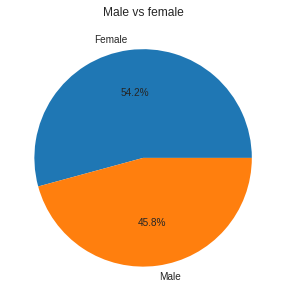

In [65]:
plt.figure(figsize=(5,5))
plt.title('Male vs female')
plt.pie(data_modified['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%')
plt.show()

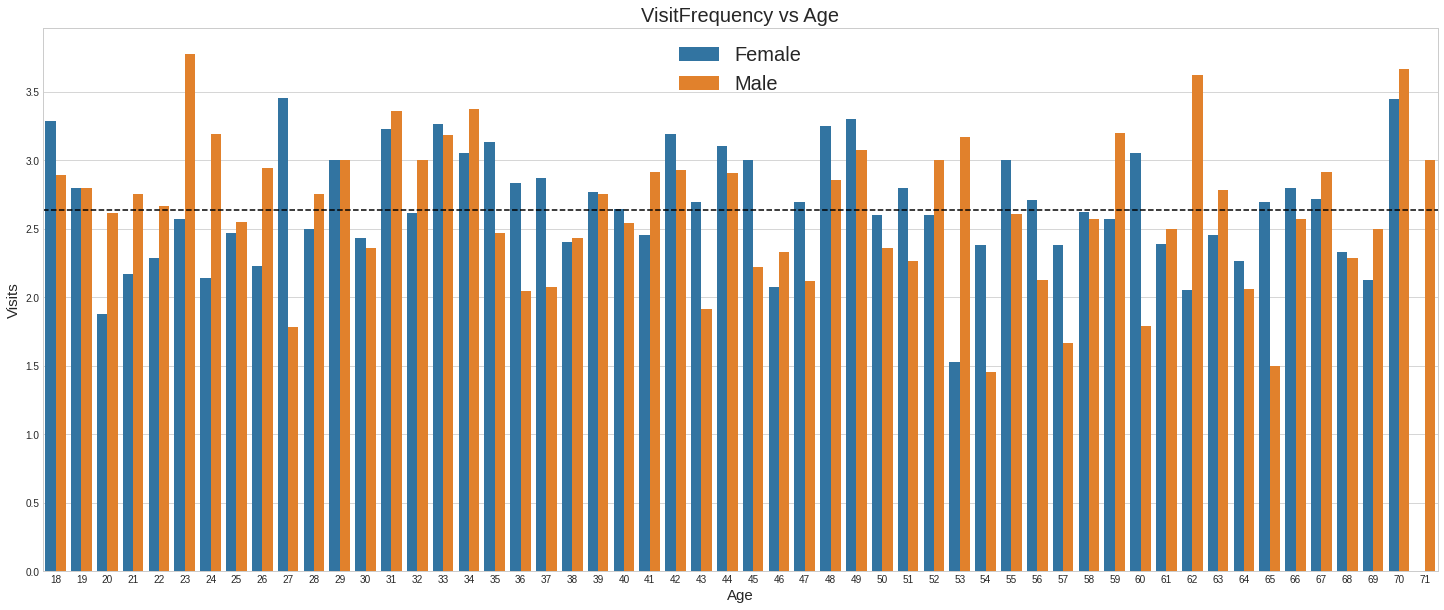

In [66]:
plt.figure(figsize=(25,10))
plt.style.use("seaborn-whitegrid")
plt.title('VisitFrequency vs Age', fontsize=20)

ageplot = sns.barplot(
    x="Age", y="VisitFrequency", 
    hue="Gender",data=data_modified,
    ci=None)

plt.legend(["Female", "Male"], fontsize=20)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Visits", fontsize = 15)
plt.axhline(data_modified["VisitFrequency"].mean(), linestyle='--', color='k')
plt.show()

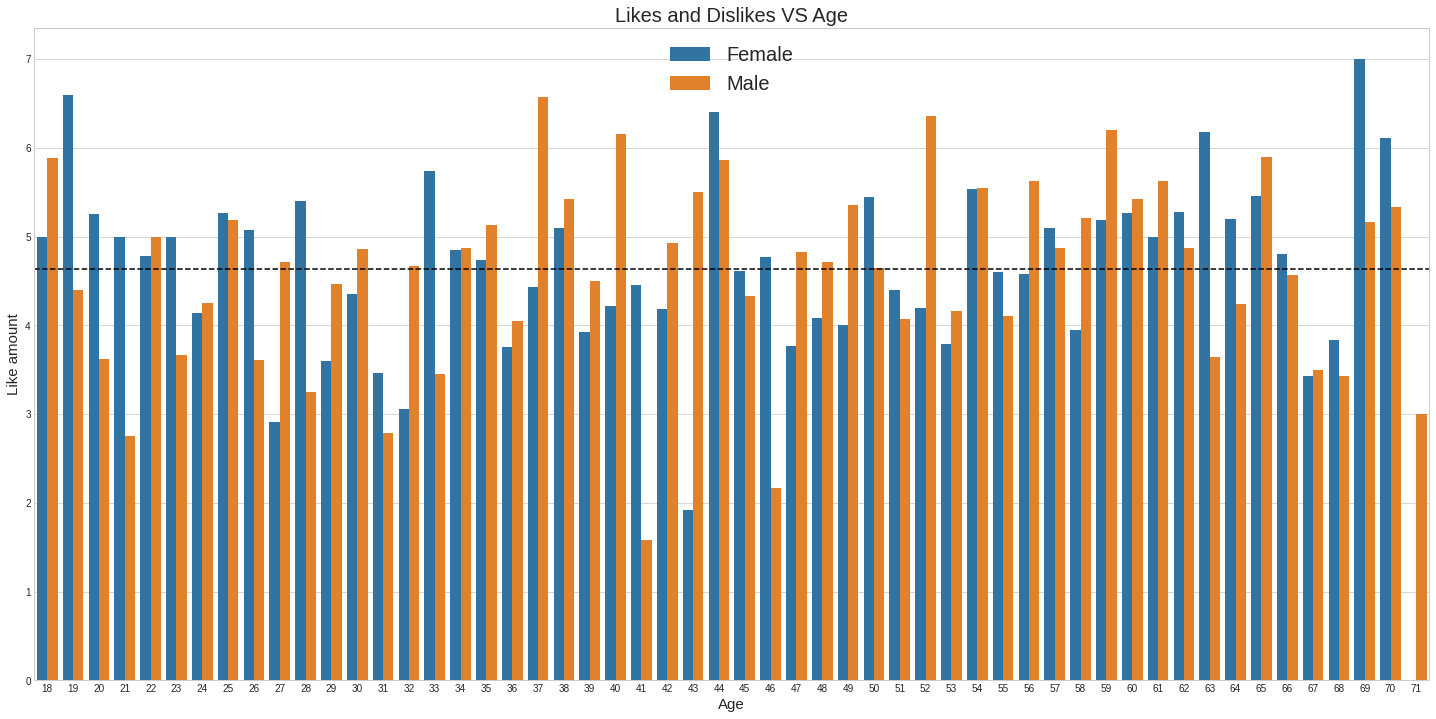

In [67]:
plt.figure(figsize=(25,12))
plt.style.use("seaborn-whitegrid")
plt.title('Likes and Dislikes VS Age', fontsize=20)
bar = sns.barplot(
    data=data_modified, 
    y="Like", x="Age",
    hue="Gender",
    ci = None 
)
plt.legend(["Female", "Male"], fontsize=20)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Like amount", fontsize = 15)
plt.axhline(data_modified["Like"].mean(), linestyle='--', color='k')
plt.show()

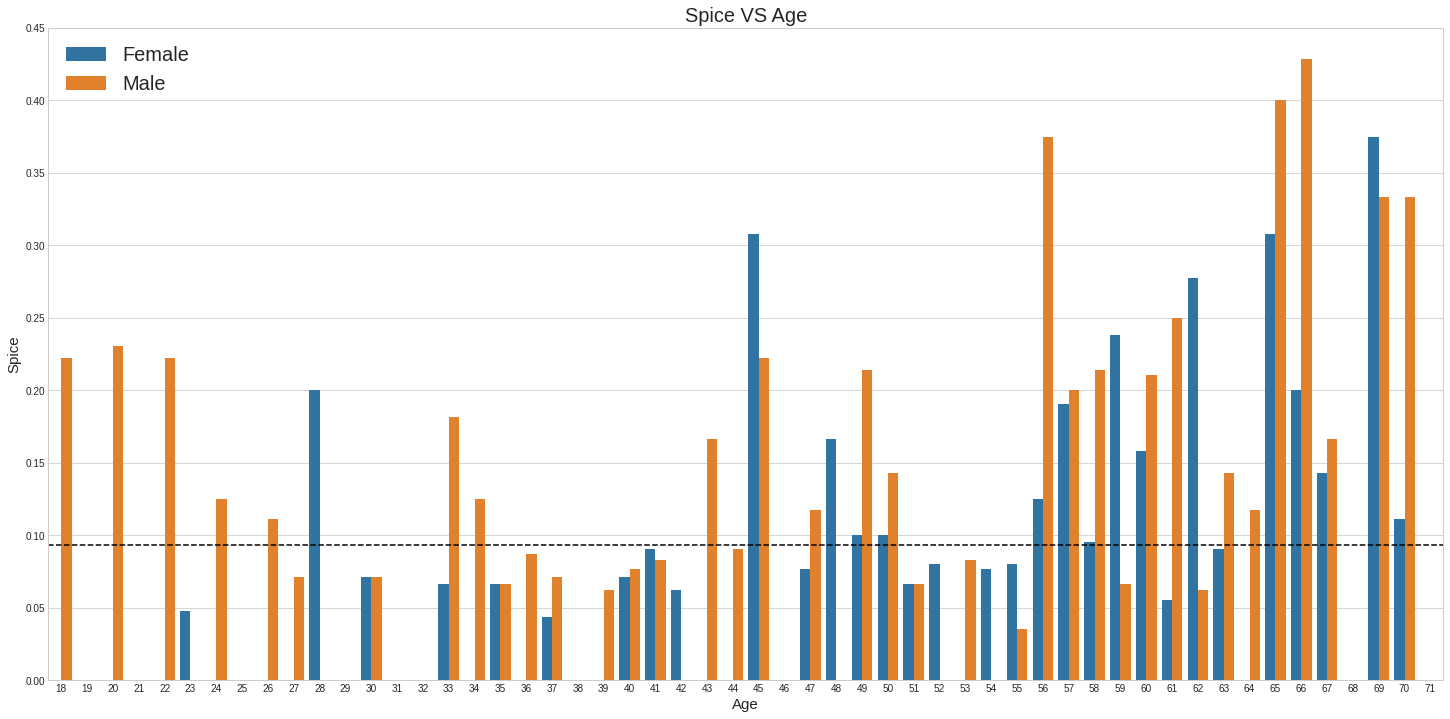

In [68]:
plt.figure(figsize=(25,12))
plt.style.use("seaborn-whitegrid")
plt.title('Spice VS Age', fontsize=20)
bar = sns.barplot(
    data=data_modified, 
    y="spicy", x="Age",
    hue="Gender",
    ci = None 
)

plt.legend(["Female", "Male"], fontsize=20)
plt.ylabel("Spice", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.axhline(data_modified["spicy"].mean(), linestyle='--', color='k')
plt.show()

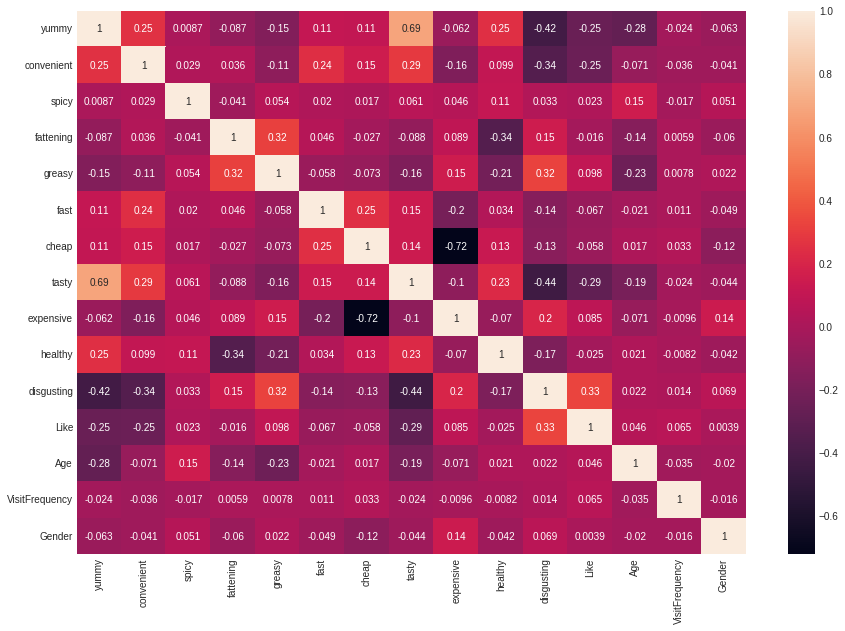

In [69]:
plt. figure(figsize=(15,10))

cor = data_modified.corr()
sns.heatmap(cor, annot=True)
plt.show()

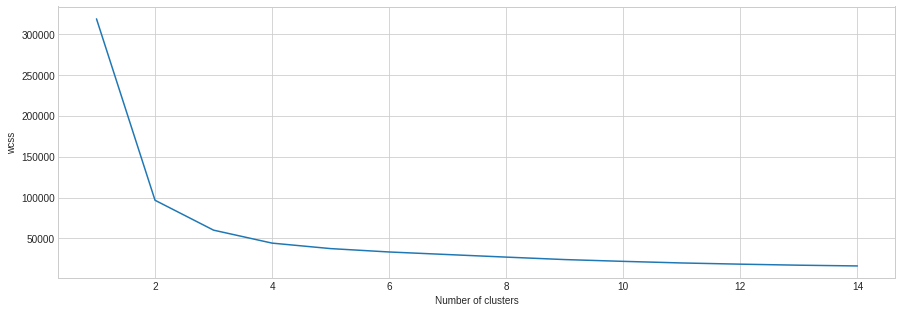

In [70]:
wcss = []
# data_model = data_modified.drop(['Age'], axis=1)
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_modified)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

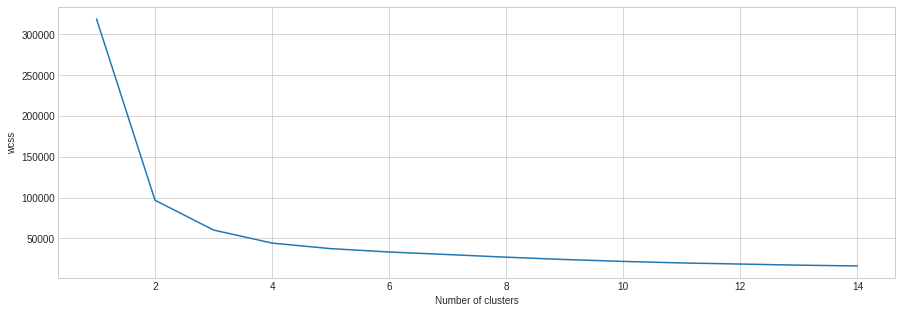

In [71]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_modified)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [72]:
data_modified

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,1,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,2,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,3,41,0,1


In [73]:
kmeans = KMeans(4, init = 'k-means++', random_state=42).fit(data_modified)
data_modified['cluster_number'] = kmeans.labels_

In [74]:
data_modified

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_number
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,5,1,3
1449,1,1,0,1,0,0,1,1,0,1,0,1,36,4,0,2
1450,1,1,0,1,0,1,0,1,1,0,0,2,52,3,0,3
1451,1,1,0,0,0,1,1,1,0,1,0,3,41,0,1,2


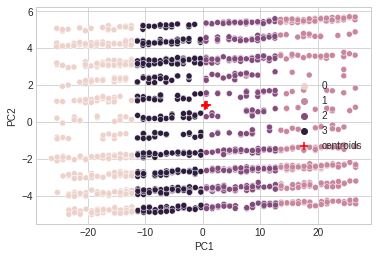

In [75]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

x = data_modified.values
pca = preprocessing.scale(x)
pca = PCA(n_components=15)
pca = pca.fit_transform(x)

pf = pd.DataFrame(data=pca, columns=[f"PC{i+1}" for i in range(15)])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', c="r", s=50, label='centroids')
plt.legend()
plt.show()


In [76]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

cross = pd.crosstab(data_modified['cluster_number'], data_modified['Like'])
cross = cross[list(np.arange(11))]
cross

Like,0,1,2,3,4,5,6,7,8,9,10
cluster_number,,,,,,,,,,,
0,41,39,45,36,12,14,26,29,52,58,19
1,33,45,75,41,12,10,7,4,21,15,66
2,36,54,63,45,13,14,18,17,46,37,39
3,42,49,46,38,21,21,22,21,50,42,19


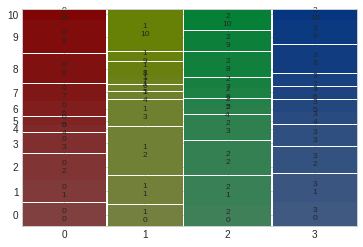

In [77]:
mosaic(cross.stack())
plt.show()

In [78]:
cross_gender = pd.crosstab(data_modified['cluster_number'], data_modified['Gender'])
cross_gender

Gender,0,1
cluster_number,,
0,204,167
1,172,157
2,200,182
3,212,159


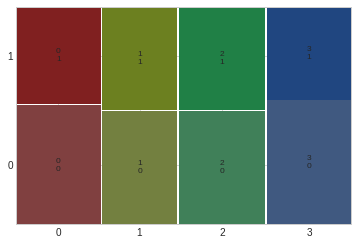

In [79]:
mosaic(cross_gender.stack())
plt.show()

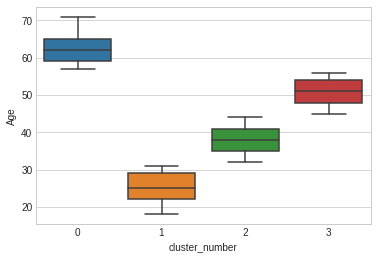

In [80]:
sns.boxplot(x='cluster_number', y='Age', data=data_modified)

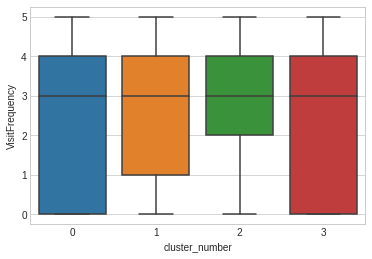

In [81]:
sns.boxplot(x='cluster_number', y='VisitFrequency', data=data_modified)

In [91]:
cross_health = pd.crosstab(data_modified['cluster_number'], data_modified['healthy'])
cross_health

healthy,0,1
cluster_number,,
0,294,77
1,275,54
2,294,88
3,301,70


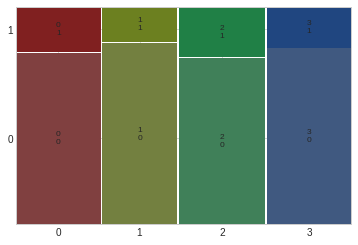

In [92]:
mosaic(cross_health.stack())
plt.show()

In [82]:
from sklearn.preprocessing import LabelEncoder

data_modified['VisitFrequency'] = LabelEncoder().fit_transform(data_modified['VisitFrequency'])
visit = data_modified.groupby('cluster_number')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_number,VisitFrequency
0,0,2.533693
1,1,2.689970
2,2,2.738220
3,3,2.592992


Inferences:

From the above three grpahs, we can say that
1. A very few customers of age groups 45-55 and 55-71, love mcdonalds food.
2. Most of the consumers of the age 18-31, like mcdonalds food.(+3, +4, +5)
3. Consumers from the cluster 2 are most frequent visitors.
4. More than 70% consumers think that mcdonalds food is unhealthy.

Marketing Mix:

1. Even though most customers of age 18-31 love the food, they are not the most frequent visitors. Since, they are young consumers, price of the food can be a major factor. Therefore, reduxing the price of the existing product or introducing a new product with less cost can increase the visitors of this age group.

2. The consumers from cluster 2 are the most frequent visitor but they didn't gave good rating to the food, therefore change in the taste of the food can increase the rating as well as visit frequency.

3. People above age 45 hate the food, introducing more healthy options can increase the customers from this age groups.